## Winters, Alexander (V00970263)

# Problem 2. Support Machines

### Sources:

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [1]:
import numpy as np
np.random.seed(1337)

In [2]:
# Plotting support
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from keras.datasets import mnist
from sklearn import svm, metrics
import time

## 2.1 Hard-Margin

In [4]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Get a specific digit from mnist: 
# https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras
train_X = train_X[(np.where((train_y == 7) | (train_y == 1))[0])]
train_y = train_y[(np.where((train_y == 7) | (train_y == 1))[0])]

test_X = test_X[(np.where((test_y == 7) | (test_y == 1))[0])]
test_y = test_y[(np.where((test_y == 7) | (test_y == 1))[0])]

# Reshape images for .fit()
train_X = np.reshape(train_X, (train_X.shape[0], 784))
test_X = np.reshape(test_X, (test_X.shape[0], 784))

clf = svm.SVC(kernel='linear', C=1000) # As C increases, the margin deceases == Hard SVM
# Start timer
hard_start = time.time()
clf.fit(train_X, train_y)

train_pred = clf.predict(train_X)
test_pred = clf.predict(test_X)

train_acc = metrics.accuracy_score(train_y, train_pred) * 100
train_err = metrics.zero_one_loss(train_y, train_pred) * 100
test_acc = metrics.accuracy_score(test_y, test_pred) * 100
test_err = metrics.zero_one_loss(test_y, test_pred) * 100

print("Hard-Margin SVM\n")
print("Training Accuracy: {:.2f}% Training Error: {:.2f}%".format(train_acc, train_err))
print("Test Accuracy: {:.2f}% Test Error: {:.2f}%".format(test_acc, test_err))
print("Total Time: {:.2f}s".format(time.time() - hard_start))

Hard-Margin SVM

Training Accuracy: 100.00% Training Error: 0.00%
Test Accuracy: 99.17% Test Error: 0.83%
Total Time: 1.55s


Somewhat surprisingly, the hard-margin svm classifier is very good with ~99% accuracy. I did not know the data was linerably seperable, and thus, it performs so well. 

## 2.2 Soft-Margin

In [5]:
from sklearn.model_selection import GridSearchCV, KFold

In [6]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Get a specific digit from mnist: 
# https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras
train_X = train_X[(np.where((train_y == 7) | (train_y == 1))[0])]
train_y = train_y[(np.where((train_y == 7) | (train_y == 1))[0])]

test_X = test_X[(np.where((test_y == 7) | (test_y == 1))[0])]
test_y = test_y[(np.where((test_y == 7) | (test_y == 1))[0])]

# Reshape images for .fit()
train_X = np.reshape(train_X, (train_X.shape[0], 784))
test_X = np.reshape(test_X, (test_X.shape[0], 784))

params = {'C': [0.1, 0.001, 0.00001], 'kernel': ['linear']}

soft_start = time.time()
models = GridSearchCV(estimator=svm.SVC(), param_grid=params, cv=KFold(5), verbose=10)
results = models.fit(train_X, train_y)

best_C = results.best_params_['C']

train_pred = results.best_estimator_.predict(train_X)
test_pred = results.best_estimator_.predict(test_X)

train_acc = metrics.accuracy_score(train_y, train_pred) * 100
train_err = metrics.zero_one_loss(train_y, train_pred) * 100
test_acc = metrics.accuracy_score(test_y, test_pred) * 100
test_err = metrics.zero_one_loss(test_y, test_pred) * 100

print("\nSoft-Margin SVM with Best Hyperparameter C: " + str(best_C) + "\n")
print("Training Accuracy: {:.2f}% Training Error: {:.2f}%".format(train_acc, train_err))
print("Test Accuracy: {:.2f}% Test Error: {:.2f}%".format(test_acc, test_err))
print("Total Time: {:.2f}s".format(time.time() - soft_start))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START C=0.1, kernel=linear........................................
[CV 1/5; 1/3] END .........C=0.1, kernel=linear;, score=0.995 total time=   0.8s
[CV 2/5; 1/3] START C=0.1, kernel=linear........................................
[CV 2/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   0.7s
[CV 3/5; 1/3] START C=0.1, kernel=linear........................................
[CV 3/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   0.7s
[CV 4/5; 1/3] START C=0.1, kernel=linear........................................
[CV 4/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   0.7s
[CV 5/5; 1/3] START C=0.1, kernel=linear........................................
[CV 5/5; 1/3] END .........C=0.1, kernel=linear;, score=0.994 total time=   0.7s
[CV 1/5; 2/3] START C=0.001, kernel=linear......................................
[CV 1/5; 2/3] END .......C=0.001, kernel=linear;,

The results for the soft-margin svm classifier, are marginally better with again ~99% accuracy. The cross-validation provided the best C hyperparameter: with a value of 0.00001. 

## 2.3 Kernel

### a) Polynomial

In [7]:
from sklearn.model_selection import GridSearchCV, KFold

In [10]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Get a specific digit from mnist: 
# https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras
train_X = train_X[(np.where((train_y == 7) | (train_y == 1))[0])]
train_y = train_y[(np.where((train_y == 7) | (train_y == 1))[0])]

test_X = test_X[(np.where((test_y == 7) | (test_y == 1))[0])]
test_y = test_y[(np.where((test_y == 7) | (test_y == 1))[0])]

# Reshape images for .fit()
train_X = np.reshape(train_X, (train_X.shape[0], 784))
test_X = np.reshape(test_X, (test_X.shape[0], 784))

# 2 is usually the best
params = {'C': [1e-5], 'kernel': ['poly'], 'degree': [1, 2, 3], 'gamma': [1., 0.1, 0.001]}

poly_start = time.time()
poly_models = GridSearchCV(estimator=svm.SVC(), param_grid=params, cv=KFold(2), verbose=10)
results = poly_models.fit(train_X, train_y)

best_deg = results.best_params_['degree']
best_gamma = results.best_params_['gamma']

train_pred = results.best_estimator_.predict(train_X)
test_pred = results.best_estimator_.predict(test_X)

train_acc = metrics.accuracy_score(train_y, train_pred) * 100
train_err = metrics.zero_one_loss(train_y, train_pred) * 100
test_acc = metrics.accuracy_score(test_y, test_pred) * 100
test_err = metrics.zero_one_loss(test_y, test_pred) * 100

print("\nPolynomial SVM with Best Hyperparameter Degree: {} and Gamma: {}".format(best_deg, best_gamma))
print("Training Accuracy: {:.2f}% Training Error: {:.2f}%".format(train_acc, train_err))
print("Test Accuracy: {:.2f}% Test Error: {:.2f}%".format(test_acc, test_err))
print("Total Time: {:.2f}s".format(time.time() - poly_start))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2; 1/9] START C=1e-05, degree=1, gamma=1.0, kernel=poly...................
[CV 1/2; 1/9] END C=1e-05, degree=1, gamma=1.0, kernel=poly;, score=0.995 total time=   0.4s
[CV 2/2; 1/9] START C=1e-05, degree=1, gamma=1.0, kernel=poly...................
[CV 2/2; 1/9] END C=1e-05, degree=1, gamma=1.0, kernel=poly;, score=0.994 total time=   0.3s
[CV 1/2; 2/9] START C=1e-05, degree=1, gamma=0.1, kernel=poly...................
[CV 1/2; 2/9] END C=1e-05, degree=1, gamma=0.1, kernel=poly;, score=0.996 total time=   0.5s
[CV 2/2; 2/9] START C=1e-05, degree=1, gamma=0.1, kernel=poly...................
[CV 2/2; 2/9] END C=1e-05, degree=1, gamma=0.1, kernel=poly;, score=0.995 total time=   0.4s
[CV 1/2; 3/9] START C=1e-05, degree=1, gamma=0.001, kernel=poly.................
[CV 1/2; 3/9] END C=1e-05, degree=1, gamma=0.001, kernel=poly;, score=0.989 total time=   2.8s
[CV 2/2; 3/9] START C=1e-05, degree=1, gamma=0.001, kernel=poly.....

### b) RBF

In [11]:
from sklearn.model_selection import GridSearchCV, KFold

In [12]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Get a specific digit from mnist: 
# https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras
train_X = train_X[(np.where((train_y == 7) | (train_y == 1))[0])]
train_y = train_y[(np.where((train_y == 7) | (train_y == 1))[0])]

test_X = test_X[(np.where((test_y == 7) | (test_y == 1))[0])]
test_y = test_y[(np.where((test_y == 7) | (test_y == 1))[0])]

# Reshape images for .fit()
train_X = np.reshape(train_X, (train_X.shape[0], 784))
test_X = np.reshape(test_X, (test_X.shape[0], 784))

params = {'C': [1e-5], 'kernel': ['rbf'], 'gamma': [1., 0.1, 0.001]}

rbf_start = time.time()
rbf_models = GridSearchCV(estimator=svm.SVC(), param_grid=params, cv=KFold(2), verbose=10)
results = rbf_models.fit(train_X, train_y)

best_gam = results.best_params_['gamma']

train_pred = results.best_estimator_.predict(train_X)
test_pred = results.best_estimator_.predict(test_X)

train_acc = metrics.accuracy_score(train_y, train_pred) * 100
train_err = metrics.zero_one_loss(train_y, train_pred) * 100
test_acc = metrics.accuracy_score(test_y, test_pred) * 100
test_err = metrics.zero_one_loss(test_y, test_pred) * 100

print("\nRBF SVM with Best Hyperparameter Gamma: " + str(best_gam))
print("Training Accuracy: {:.2f}% Training Error: {:.2f}%".format(train_acc, train_err))
print("Test Accuracy: {:.2f}% Test Error: {:.2f}%".format(test_acc, test_err))
print("Total Time: {:.2f}s".format(time.time() - rbf_start))

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2; 1/3] START C=1e-05, gamma=1.0, kernel=rbf..............................
[CV 1/2; 1/3] END C=1e-05, gamma=1.0, kernel=rbf;, score=0.524 total time=  34.4s
[CV 2/2; 1/3] START C=1e-05, gamma=1.0, kernel=rbf..............................
[CV 2/2; 1/3] END C=1e-05, gamma=1.0, kernel=rbf;, score=0.512 total time=  32.9s
[CV 1/2; 2/3] START C=1e-05, gamma=0.1, kernel=rbf..............................
[CV 1/2; 2/3] END C=1e-05, gamma=0.1, kernel=rbf;, score=0.524 total time=  33.6s
[CV 2/2; 2/3] START C=1e-05, gamma=0.1, kernel=rbf..............................
[CV 2/2; 2/3] END C=1e-05, gamma=0.1, kernel=rbf;, score=0.512 total time=  32.7s
[CV 1/2; 3/3] START C=1e-05, gamma=0.001, kernel=rbf............................
[CV 1/2; 3/3] END C=1e-05, gamma=0.001, kernel=rbf;, score=0.524 total time=  33.6s
[CV 2/2; 3/3] START C=1e-05, gamma=0.001, kernel=rbf............................
[CV 2/2; 3/3] END C=1e-05, gamma=0.001, ker

### c) Linear

In [13]:
from sklearn.model_selection import GridSearchCV, KFold

In [14]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Get a specific digit from mnist: 
# https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras
train_X = train_X[(np.where((train_y == 7) | (train_y == 1))[0])]
train_y = train_y[(np.where((train_y == 7) | (train_y == 1))[0])]

test_X = test_X[(np.where((test_y == 7) | (test_y == 1))[0])]
test_y = test_y[(np.where((test_y == 7) | (test_y == 1))[0])]

# Reshape images for .fit()
train_X = np.reshape(train_X, (train_X.shape[0], 784))
test_X = np.reshape(test_X, (test_X.shape[0], 784))

params = {'C': [1e-5], 'kernel': ['linear']}

linear_start = time.time()
linear_models = GridSearchCV(estimator=svm.SVC(), param_grid=params, cv=KFold(2), verbose=10)
results = linear_models.fit(train_X, train_y)

train_pred = results.best_estimator_.predict(train_X)
test_pred = results.best_estimator_.predict(test_X)

train_acc = metrics.accuracy_score(train_y, train_pred) * 100
train_err = metrics.zero_one_loss(train_y, train_pred) * 100
test_acc = metrics.accuracy_score(test_y, test_pred) * 100
test_err = metrics.zero_one_loss(test_y, test_pred) * 100

print("\nLinear SVM with Best Hyperparameter C: " + str(1e-5))
print("Training Accuracy: {:.2f}% Training Error: {:.2f}%".format(train_acc, train_err))
print("Test Accuracy: {:.2f}% Test Error: {:.2f}%".format(test_acc, test_err))
print("Total Time: {:.2f}s".format(time.time() - linear_start))

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV 1/2; 1/1] START C=1e-05, kernel=linear......................................
[CV 1/2; 1/1] END .......C=1e-05, kernel=linear;, score=0.995 total time=   0.4s
[CV 2/2; 1/1] START C=1e-05, kernel=linear......................................
[CV 2/2; 1/1] END .......C=1e-05, kernel=linear;, score=0.994 total time=   0.3s

Linear SVM with Best Hyperparameter C: 1e-05
Training Accuracy: 99.95% Training Error: 0.05%
Test Accuracy: 99.31% Test Error: 0.69%
Total Time: 2.53s


## 2.4 AVA

In [15]:
import pandas as pd

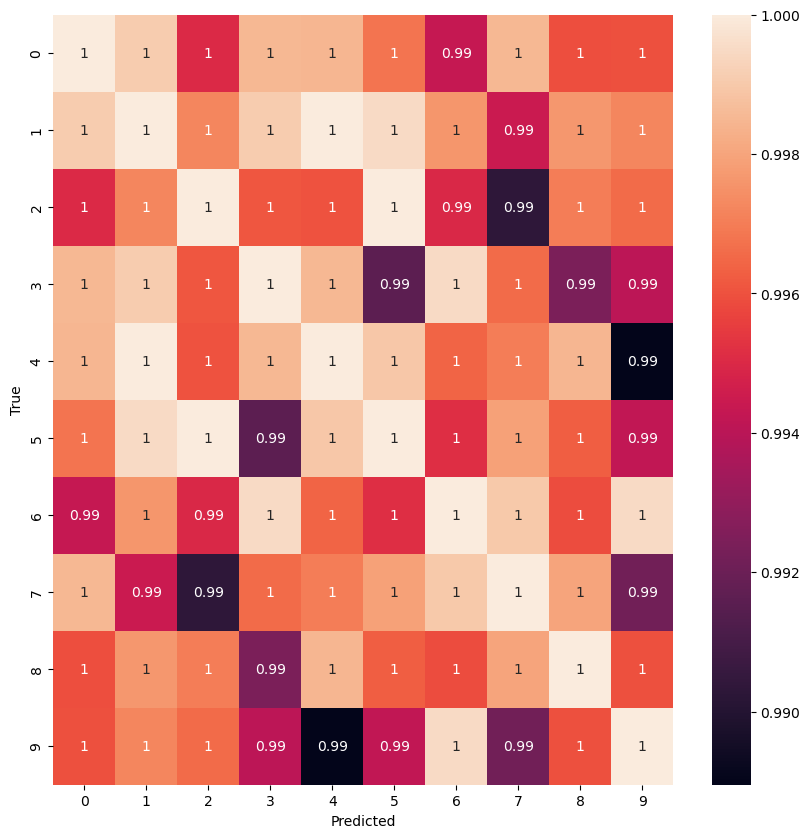


AVA with Best Hyperparameters C: 1e-05, Degree: 2, and Gamma: 1.0
Test Accuracy: 1.00% Test Error: 0.00%
Total Time: 181.49s


In [16]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Best hyperparameters
best_C = 1e-5
best_deg = 2
best_gam = 1.0

# 0 - 9
num_classes = 10

# Initialize 10x10 array with 0's
heatmap = np.zeros((10, 10))

ava_start = time.time()

for i in range(num_classes):
    for j in range(num_classes):
        # If a class is equal to itself make it equal 1
        if i == j:
            heatmap[i][j] = 1.
            continue
        
        # Get a specific digit from mnist: 
        # https://stackoverflow.com/questions/51202181/how-do-i-select-only-a-specific-digit-from-the-mnist-dataset-provided-by-keras
        train_X_tmp = train_X[(np.where((train_y == i) | (train_y == j))[0])]
        train_y_tmp = train_y[(np.where((train_y == i) | (train_y == j))[0])]

        test_X_tmp = test_X[(np.where((test_y == i) | (test_y == j))[0])]
        test_y_tmp = test_y[(np.where((test_y == i) | (test_y == j))[0])]

        # Reshape images for .fit()
        train_X_tmp = np.reshape(train_X_tmp, (train_X_tmp.shape[0], 784))
        test_X_tmp = np.reshape(test_X_tmp, (test_X_tmp.shape[0], 784))
    
        # Use our best kernal from above with the best parameters
        clf = svm.SVC(kernel='poly', C=best_C, degree=best_deg, gamma=best_gam)
        clf.fit(train_X_tmp, train_y_tmp)

        y_pred = clf.predict(test_X_tmp)

        acc = metrics.accuracy_score(test_y_tmp, y_pred)
        err = metrics.zero_one_loss(test_y_tmp, y_pred)
        heatmap[i][j] = acc

plt.subplots(figsize=(10, 10))
columns = list(range(0, 10))
result = pd.DataFrame(heatmap, columns, columns)
sns.heatmap(result, annot_kws={'size': 10}, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("\nAVA with Best Hyperparameters C: {}, Degree: {}, and Gamma: {}".format(best_C, best_deg, best_gam))
print("Test Accuracy: {:.2f}% Test Error: {:.2f}%".format(acc, err))
print("Total Time: {:.2f}s".format(time.time() - ava_start))